In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Örnek Veri
texts = ["I love Algeria", "machine learning", "Artificial intelligence", "AI"]

# 1. Tokenization & Kelime İndeksi Oluşturma
tokenized_texts = [sentence.lower().split() for sentence in texts]
word_index = {}
index = 1  # 0 genellikle padding için kullanılır
for sentence in tokenized_texts:
    for word in sentence:
        if word not in word_index:
            word_index[word] = index
            index += 1
print("Kelime İndeksi:", word_index)

Kelime İndeksi: {'i': 1, 'love': 2, 'algeria': 3, 'machine': 4, 'learning': 5, 'artificial': 6, 'intelligence': 7, 'ai': 8}


In [ ]:

# 2. Texts-to-Sequence Dönüşümü
sequences = [[word_index[word] for word in sentence if word in word_index]
            for sentence in tokenized_texts]
print("\nDiziler:", sequences)



Diziler: [[1, 2, 3], [4, 5], [6, 7], [8]]


In [ ]:
# 3. Sequence Padding
maxlen = 4  # Örnek uzunluk
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post', value=0)
print("\nPadlenmiş Diziler:\n", padded_sequences)


Padlenmiş Diziler:
 [[1 2 3 0]
 [4 5 0 0]
 [6 7 0 0]
 [8 0 0 0]]


In [ ]:
# 4. TF-IDF Hesaplama
tfidf_vectorizer = TfidfVectorizer(vocabulary=list(word_index.keys()))
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(sentence) for sentence in tokenized_texts])
print("\nTF-IDF Matrisi:\n", tfidf_matrix.toarray())


TF-IDF Matrisi:
 [[0.         0.70710678 0.70710678 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.70710678 0.70710678 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.70710678
  0.70710678 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.        ]]


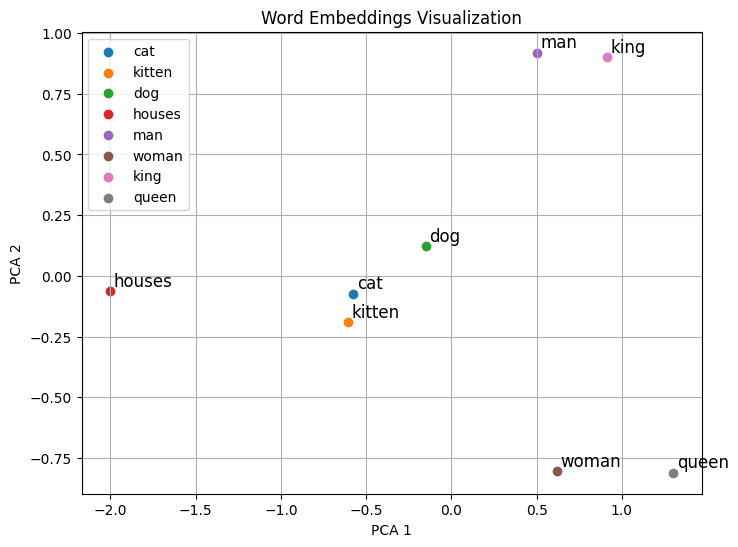

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Örnek kelimeler ve vektörleri
words = ["cat", "kitten", "dog", "houses", "man", "woman", "king", "queen"]
embeddings = np.array([
    [0.6, 0.9, 0.1, 0.4, -0.7, -0.3, -0.2],
    [0.5, 0.8, -0.1, 0.2, -0.6, -0.5, -0.1],
    [0.7, -0.1, 0.4, 0.3, -0.4, -0.1, -0.3],
    [-0.8, -0.4, -0.5, 0.1, -0.9, 0.3, 0.8],
    [0.6, -0.2, 0.8, 0.9, -0.1, -0.9, -0.7],
    [0.7, 0.3, 0.9, -0.7, 0.1, -0.5, -0.4],
    [0.5, -0.4, 0.7, 0.8, 0.9, -0.7, -0.6],
    [0.8, -0.1, 0.8, -0.9, 0.8, -0.5, -0.9]
])

# Boyut düşürme (PCA)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Görselleştirme
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], label=word)
    plt.text(reduced_embeddings[i, 0] + 0.02, reduced_embeddings[i, 1] + 0.02, word, fontsize=12)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Word Embeddings Visualization")
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


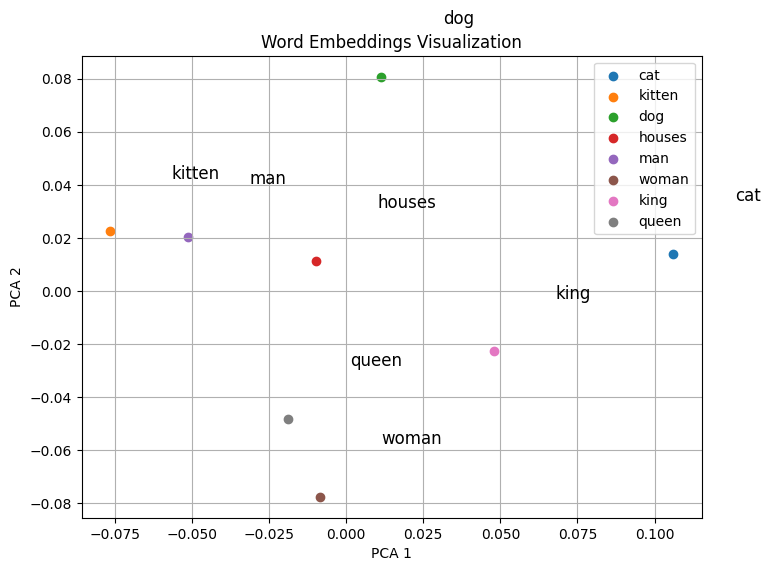

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
import tensorflow as tf

# Örnek kelimeler
words = ["cat", "kitten", "dog", "houses", "man", "woman", "king", "queen"]

# Tokenizer ile kelimeleri indekslere dönüştürme
tokenizer = Tokenizer()
tokenizer.fit_on_texts(words)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(words)
padded_sequences = pad_sequences(sequences, maxlen=1)

# Embedding katmanı ile vektör oluşturma
embedding_dim = 10
model = Sequential([
    Embedding(input_dim=len(word_index) + 1,
              output_dim=embedding_dim, input_length=1)
])

# Modeli çalıştır ve gömme vektörlerini al
model.compile()
embeddings = model.predict(padded_sequences)
embeddings = embeddings.squeeze()

# Boyut düşürme (PCA)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Görselleştirme
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], label=word)
    plt.text(reduced_embeddings[i, 0] + 0.02,
             reduced_embeddings[i, 1] + 0.02, word, fontsize=12)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Word Embeddings Visualization")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Örnek cümleler
documents = ["Bu harika bir film", "Bu film çok kötü",
             "Mükemmel bir yapım", "Berbat bir deneyim"]

# Bag of Words (BoW) modelini oluşturma
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# BoW matrisini DataFrame olarak gösterme
bow_df = pd.DataFrame(X.toarray(),
                      columns=vectorizer.get_feature_names_out())
print("Bag of Words Temsili:")
print(bow_df)


Bag of Words Temsili:
   berbat  bir  bu  deneyim  film  harika  kötü  mükemmel  yapım  çok
0       0    1   1        0     1       1     0         0      0    0
1       0    0   1        0     1       0     1         0      0    1
2       0    1   0        0     0       0     0         1      1    0
3       1    1   0        1     0       0     0         0      0    0


# **Transformers**

Encoder

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

1. Input Embedding


*   Function: Converts input tokens (words or subwords) into fixed-size vectors.
*   Process: Each token is converted into a vector of size d_model using a learnable embedding matrix.
*Feature: Embeddings are multiplied by sqrt(d_model). This helps maintain size balance when adding positional encodings.





#1. Input Embedding

#İşlevi: Giriş tokenlerini (kelimeler veya alt kelimeler) sabit boyutlu vektörlere dönüştürür.
#İşlem: Her token, öğrenilebilen bir gömme matrisi (embedding matrix) kullanılarak d_model boyutlu bir vektöre dönüştürülür.
#Özellik: Embeddingler sqrt(d_model) ile çarpılır. Bu, pozisyonel kodlamaların eklenmesi sırasında boyut dengesini korumaya yardımcı olur.

In [2]:
class InputEmbedding(nn.Module):
    def __init__(self, vocab_size, d_model):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.d_model = d_model

    def forward(self, x):
        # Embeddinglara sqrt(d_model) faktörü ile ölçekleme yapılır
        return self.embedding(x) * math.sqrt(self.d_model)

In [ ]:
#2. Positional Encoding

#İşlevi: Dizi sırasını (kelime pozisyonlarını) modele tanıtır, çünkü Transformer'ın kendisi sıra bilgisine sahip değildir.
#İşlem: Sinüs ve kosinüs fonksiyonları kullanılarak her pozisyon için benzersiz bir kod oluşturulur.
#Formül:

#PE(pos, 2i) = sin(pos / 10000^(2i/d_model))
#PE(pos, 2i+1) = cos(pos / 10000^(2i/d_model))


#2. Positional Encoding

#Function: Introduces the sequence order (word positions) to the model, since the Transformer itself does not have the sequence information.
#Process: A unique code is created for each position using the sine and cosine functions.
#Formula:

#PE(pos, 2i) = sin(pos / 10000^(2i/d_model))
#PE(pos, 2i+1) = cos(pos / 10000^(2i/d_model))


class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_length, dropout=0.1):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        # Pozisyonel encoding matrisini oluştur
        pe = torch.zeros(max_seq_length, d_model)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        # Sinüs fonksiyonu çift indeksler için
        pe[:, 0::2] = torch.sin(position * div_term)
        # Kosinüs fonksiyonu tek indeksler için
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)  # Batch boyutunu ekle
        self.register_buffer('pe', pe)

    def forward(self, x):
        # Pozisyonel encodingler embeddinglara eklenir
        x = x + self.pe[:, :x.size(1), :]
        return self.dropout(x)

In [ ]:

#3. Multi-Head Attention

#İşlevi: Attention mekanizmasının temel yapı taşı, girdilerdeki ilişkileri yakalama yeteneği sağlar.
#Alt Bileşenler:

#Query (Q): Arama nedir?
#Key (K): Neyle eşleştirilmeli?
#Value (V): Eşleşirse hangi bilgi alınacak?


#Hesaplama Adımları:

#Q, K, V için lineer projeksiyonlar oluşturulur
#Attention skorları hesaplanır: QK^T / √d_k
#Softmax ile normalizasyon
#Değerler (V) ile çarpılarak ağırlıklı toplam alınır
#Multi-Head Avantajı: Farklı temsil alt uzaylarında bilgiyi birleştirir, modelin aynı anda farklı özelliklere odaklanmasını sağlar.


#3. Multi-Head Attention

#Function: The basic building block of the Attention mechanism, it provides the ability to capture relationships in inputs.

#Sub-Components:

#Query (Q): What is the search?
#Key (K): What should it match?
#Value (V): What information will be retrieved if it matches?

#Calculation Steps:

#Linear projections are created for Q, K, V
#Attention scores are calculated: QK^T / √d_k
#Normalization with Softmax
#Weighted sum is obtained by multiplying values ​​(V)
#Multi-Head Advantage: It combines information in different representation subspaces, allowing the model to focus on different features at the same time.

class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads, dropout=0.1):
        super().__init__()
        assert d_model % num_heads == 0, "d_model, num_heads'e tam bölünmelidir"

        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads

        # Query, Key, Value ve çıktı için lineer dönüşümler
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)

        self.dropout = nn.Dropout(dropout)

    def scaled_dot_product_attention(self, Q, K, V, mask=None):
        # Attention skorlarını hesapla
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)

        # Maskeleme (decoder'da kullanılır)
        if mask is not None:
            attn_scores = attn_scores.masked_fill(mask == 0, -1e9)

        # Softmax ile normalizasyon
        attn_probs = F.softmax(attn_scores, dim=-1)
        attn_probs = self.dropout(attn_probs)

        # Değerleri attention ağırlıklarına göre topla
        output = torch.matmul(attn_probs, V)
        return output

    def forward(self, Q, K, V, mask=None):
        batch_size = Q.size(0)

        # Lineer projeksiyonlar ve yeniden şekillendirme
        q = self.W_q(Q).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        k = self.W_k(K).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        v = self.W_v(V).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)

        # Scaled Dot-Product Attention
        attn_output = self.scaled_dot_product_attention(q, k, v, mask)

        # Yeniden şekillendirme ve son lineer projeksiyon
        attn_output = attn_output.transpose(1, 2).contiguous().view(batch_size, -1, self.d_model)
        output = self.W_o(attn_output)

        return output


In [ ]:
#5. Feed-Forward Networks

#İşlevi: Her pozisyondaki bilgiyi bağımsız olarak işler.
#Yapı: İki lineer dönüşüm ve bir ReLU aktivasyonu.
#Formül: FFN(x) = max(0, xW₁ + b₁)W₂ + b₂
#Boyutlar: d_model → d_ff → d_model (genellikle d_ff, d_model'den 4 kat büyüktür)


#5. Feed-Forward Networks

#Function: Processes information at each position independently.
#Structure: Two linear transformations and a ReLU activation.
#Formula: FFN(x) = max(0, xW₁ + b₁)W₂ + b₂
#Dimensions: d_model → d_ff → d_model (usually d_ff is 4 times larger than d_model)


class FeedForward(nn.Module):
    def __init__(self, d_model, d_ff, dropout=0.1):
        super().__init__()
        self.linear_1 = nn.Linear(d_model, d_ff)
        self.linear_2 = nn.Linear(d_ff, d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # İlk lineer katman ve ReLU aktivasyonu
        x = F.relu(self.linear_1(x))
        x = self.dropout(x)
        # İkinci lineer katman
        x = self.linear_2(x)
        return x

In [ ]:
#6. Add & Norm (Kalıntı Bağlantılar ve Katman Normalizasyonu)

#Kalıntı Bağlantılar:

#İşlevi: Derin ağların eğitimini kolaylaştırır, gradyan kaybolması sorununu azaltır.
#İşlem: Alt katmanın çıktısı, girişine eklenir.


#Katman Normalizasyonu:

#İşlevi: Eğitimi stabilize eder ve hızlandırır.
#İşlem: Her özellik vektörünün ortalaması ve varyansı normalize edilir.

#6. Add & Norm (Residual Connections and Layer Normalization)

#Residual Connections:

#Function: Facilitates the training of deep networks, reduces the gradient vanishing problem.
#Process: The output of the lower layer is added to its input.

#Layer Normalization:

#Function: Stabilizes and speeds up training.
#Process: The mean and variance of each feature vector are normalized.

#7. Encoder

#İşlevi: Giriş dizisini analiz eder ve bir dizi temsil (representation) üretir.
#Yapı: N adet özdeş katman, her biri iki alt katmandan oluşur:

#Multi-head self-attention
#Feed-forward network


#Her alt katmandan sonra kalıntı bağlantı ve katman normalizasyonu uygulanır.

#7. Encoder

#Function: Analyzes the input sequence and produces a set of representations.
#Structure: N identical layers, each consisting of two sublayers:

#Multi-head self-attention
#Feed-forward network

#After each sublayer, residual connectivity and layer normalization are applied.

class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super().__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads, dropout)
        self.feed_forward = FeedForward(d_model, d_ff, dropout)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask=None):
        # Self-attention ile attn_output hesapla
        attn_output = self.self_attn(x, x, x, mask)
        # Add & Norm (kalıntı bağlantı)
        x = self.norm1(x + self.dropout(attn_output))

        # Feed-forward ile ff_output hesapla
        ff_output = self.feed_forward(x)
        # Add & Norm (kalıntı bağlantı)
        x = self.norm2(x + self.dropout(ff_output))

        return x

class Encoder(nn.Module):
    def __init__(self, vocab_size, max_seq_length, d_model, num_heads, d_ff, num_layers, dropout=0.1):
        super().__init__()
        self.input_embedding = InputEmbedding(vocab_size, d_model)
        self.positional_encoding = PositionalEncoding(d_model, max_seq_length, dropout)

        # Birden fazla encoder katmanı
        self.encoder_layers = nn.ModuleList([
            EncoderLayer(d_model, num_heads, d_ff, dropout)
            for _ in range(num_layers)
        ])

    def forward(self, x, mask=None):
        # Embedding ve pozisyonel kodlama
        x = self.input_embedding(x)
        x = self.positional_encoding(x)

        # Encoder katmanlarından geçir
        for encoder_layer in self.encoder_layers:
            x = encoder_layer(x, mask)

        return x

Decoder

In [ ]:
#8. Decoder

#İşlevi: Encoder'ın çıktısını kullanarak hedef diziyi oluşturur.
#Yapı: N adet özdeş katman, her biri üç alt katmandan oluşur:

#Maskelenmiş multi-head self-attention
#Multi-head cross-attention (encoder çıktısı üzerinde)
#Feed-forward network


#Her alt katmandan sonra kalıntı bağlantı ve katman normalizasyonu uygulanır.


#8. Decoder

#Function: Generates the target sequence using the output of the encoder.
#Structure: N identical layers, each consisting of three sublayers:

#Masked multi-head self-attention
#Multi-head cross-attention (on the encoder output)
#Feed-forward network

#After each sublayer, residual connectivity and layer normalization are applied.

#9. Maskelenmiş Self-Attention

#İşlevi: Decoder'da gelecek tokenlerin görülmesini engeller.
#Nasıl: Üçgen alt matris maskesi uygulanır; her token yalnızca kendisini ve önceki tokenleri görebilir.
#Önemi: Eğitim sırasında, model henüz görmediği gelecek tokenlere erişemez, bu da test zamanındaki duruma benzer.

#10. Cross-Attention

#İşlevi: Decoder'ın encoder çıktısına erişimini sağlar.
#Mekanizma: Decoder'dan gelen query'ler, encoder çıktısından gelen key ve value'lar ile eşleştirilir.
#Önemi: Hedef dizinin üretilmesi için kaynak diziden bilgi alınmasını sağlar.

#11. Son Lineer Katman ve Softmax

#İşlevi: Decoder çıktısını hedef kelime dağılımına dönüştürür.
#İşlem:

#Lineer projeksiyon ile d_model boyutundan target_vocab_size boyutuna dönüşüm
#Softmax ile olasılık dağılımına çevirme

#8. Decoder

#Function: Generates the target sequence using the output of the encoder.

#Structure: N identical layers, each consisting of three sublayers:

#Masked multi-head self-attention
#Multi-head cross-attention (on the encoder output)
#Feed-forward network

#After each sublayer, residual connectivity and layer normalization are applied.

#8. Decoder

#Function: Generates the target sequence using the output of the encoder.

#Structure: N identical layers, each consisting of three sublayers:

#Masked multi-head self-attention
#Multi-head cross-attention (on the encoder output)
#Feed-forward network

#After each sublayer, residual connectivity and layer normalization are applied.

#9. Masked Self-Attention

#Function: Prevents future tokens from being seen in the decoder.
#How: Triangular submatrix mask is applied; each token can only see itself and previous tokens.

#Importance: During training, the model cannot access future tokens that it has not yet seen, which is similar to the test case.

#10. Cross-Attention

#Function: Allows the decoder to access the encoder output.
#Mechanism: Queries from the decoder are matched with keys and values ​​from the encoder output.
#Importance: Provides information from the source array to generate the target array.

#11. Last Linear Layer and Softmax

#Function: Converts the decoder output to the target word distribution.
#Process:

#Conversion from d_model size to target_vocab_size size with linear projection
#Conversion to probability distribution with Softmax


class DecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super().__init__()
        # 3 alt katman: Maskelenmiş self-attention, encoder-decoder attention ve feed-forward
        self.self_attn = MultiHeadAttention(d_model, num_heads, dropout)
        self.cross_attn = MultiHeadAttention(d_model, num_heads, dropout)
        self.feed_forward = FeedForward(d_model, d_ff, dropout)

        # Her alt katmandan sonra normalleştirme
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)

        self.dropout = nn.Dropout(dropout)

    def forward(self, x, enc_output, src_mask=None, tgt_mask=None):
        # Maskelenmiş self-attention
        attn_output = self.self_attn(x, x, x, tgt_mask)
        x = self.norm1(x + self.dropout(attn_output))

        # Encoder-decoder attention (cross-attention)
        # Query: decoder'ın çıktısı, Key ve Value: encoder'ın çıktısı
        attn_output = self.cross_attn(x, enc_output, enc_output, src_mask)
        x = self.norm2(x + self.dropout(attn_output))

        # Feed-forward
        ff_output = self.feed_forward(x)
        x = self.norm3(x + self.dropout(ff_output))

        return x

class Decoder(nn.Module):
    def __init__(self, vocab_size, max_seq_length, d_model, num_heads, d_ff, num_layers, dropout=0.1):
        super().__init__()
        self.input_embedding = InputEmbedding(vocab_size, d_model)
        self.positional_encoding = PositionalEncoding(d_model, max_seq_length, dropout)

        # Birden fazla decoder katmanı
        self.decoder_layers = nn.ModuleList([
            DecoderLayer(d_model, num_heads, d_ff, dropout)
            for _ in range(num_layers)
        ])

        self.fc_out = nn.Linear(d_model, vocab_size)

    def forward(self, x, enc_output, src_mask=None, tgt_mask=None):
        # Embedding ve pozisyonel kodlama
        x = self.input_embedding(x)
        x = self.positional_encoding(x)

        # Decoder katmanlarından geçir
        for decoder_layer in self.decoder_layers:
            x = decoder_layer(x, enc_output, src_mask, tgt_mask)

        # Son çıkış projeksiyonu
        output = self.fc_out(x)
        return output

class Transformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, max_seq_length, d_model=512, num_heads=8,
                 d_ff=2048, num_layers=6, dropout=0.1):
        super().__init__()

        self.encoder = Encoder(src_vocab_size, max_seq_length, d_model, num_heads, d_ff, num_layers, dropout)
        self.decoder = Decoder(tgt_vocab_size, max_seq_length, d_model, num_heads, d_ff, num_layers, dropout)

    def forward(self, src, tgt, src_mask=None, tgt_mask=None):
        # Encoder kısmı
        enc_output = self.encoder(src, src_mask)
        # Decoder kısmı
        output = self.decoder(tgt, enc_output, src_mask, tgt_mask)
        return output

    def generate_square_subsequent_mask(self, sz):
        """Üçgen alt matris maskesi oluştur (decoder'da kullanılır)"""
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

In [ ]:
!pip install transformers

Eğitim başlıyor...
Epoch 1/50, Train Loss: 1.0681, Val Loss: 1.0599, Val Accuracy: 50.00%


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:502: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:178.)
  output = torch._nested_tensor_from_mask(


Epoch 2/50, Train Loss: 0.9165, Val Loss: 1.0605, Val Accuracy: 50.00%
Epoch 3/50, Train Loss: 0.8099, Val Loss: 1.0606, Val Accuracy: 50.00%
Epoch 4/50, Train Loss: 0.6808, Val Loss: 1.0602, Val Accuracy: 50.00%
Epoch 5/50, Train Loss: 0.5529, Val Loss: 1.0599, Val Accuracy: 50.00%
Epoch 6/50, Train Loss: 0.4186, Val Loss: 1.0590, Val Accuracy: 50.00%
Epoch 7/50, Train Loss: 0.2990, Val Loss: 1.0567, Val Accuracy: 50.00%
Epoch 8/50, Train Loss: 0.1962, Val Loss: 1.0545, Val Accuracy: 50.00%
Epoch 9/50, Train Loss: 0.1485, Val Loss: 1.0524, Val Accuracy: 50.00%
Epoch 10/50, Train Loss: 0.0920, Val Loss: 1.0509, Val Accuracy: 50.00%
Epoch 11/50, Train Loss: 0.0754, Val Loss: 1.0496, Val Accuracy: 50.00%
Epoch 12/50, Train Loss: 0.0680, Val Loss: 1.0484, Val Accuracy: 50.00%
Epoch 13/50, Train Loss: 0.0453, Val Loss: 1.0474, Val Accuracy: 50.00%
Epoch 14/50, Train Loss: 0.0328, Val Loss: 1.0462, Val Accuracy: 50.00%
Epoch 15/50, Train Loss: 0.0201, Val Loss: 1.0452, Val Accuracy: 50.00%


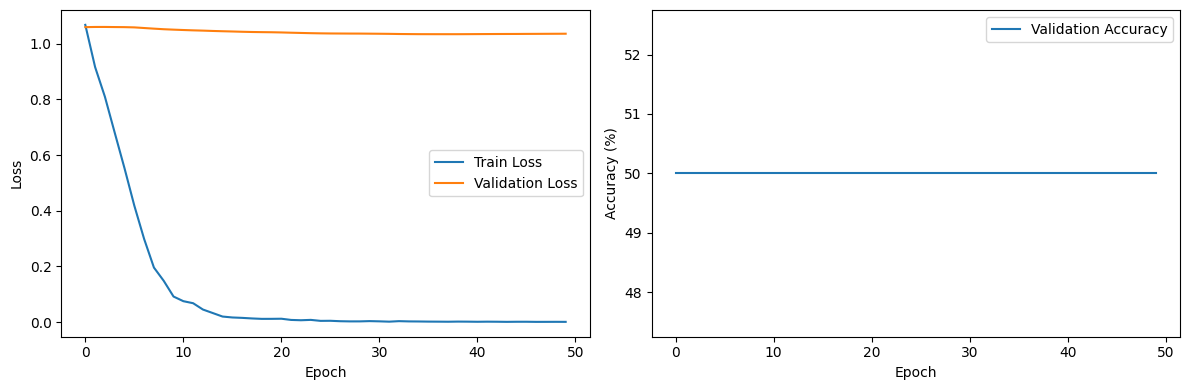


Sınıflandırma Raporu:
              precision    recall  f1-score   support

     Negatif       0.50      1.00      0.67         2
        Nötr       0.00      0.00      0.00         1
     Pozitif       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.17      0.33      0.22         4
weighted avg       0.25      0.50      0.33         4


Confusion Matrix:
[[2 0 0]
 [1 0 0]
 [1 0 0]]

Örnek Tahminler:
Metin: Bu ürün beklentilerimi aştı, kesinlikle tavsiye ederim!
Duygu: Pozitif
Sınıf Olasılıkları: [0.3555058  0.22809432 0.41639993]
--------------------------------------------------
Metin: Film vasat, izlemeseniz de olur.
Duygu: Pozitif
Sınıf Olasılıkları: [0.3438049  0.3099791  0.34621593]
--------------------------------------------------
Metin: Ürün kırık geldi, çok kötü bir deneyimdi.
Duygu: Negatif
Sınıf Olasılıkları: [0.5260612  0.19718334 0.2767555 ]
--------------------------------------------------
Metin: Konser fe

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)

#

# Veri seti oluşturma (örnek veri)
def create_sample_data():
    texts = [
        "Bu film harika, kesinlikle izlemenizi tavsiye ederim.",
        "Ürün beklentilerimi karşılamadı, çok kalitesiz.",
        "Film fena değildi ama daha iyi olabilirdi.",
        "Hayal kırıklığına uğradım, hiç beğenmedim.",
        "Bu kitap hayatımda okuduğum en güzel eserlerden biri.",
        "Yemek lezzetliydi ama servis çok yavaştı.",
        "Konseri çok beğendim, sanatçı muhteşemdi.",
        "Telefon sürekli donuyor, pişman oldum.",
        "Otel odası temiz ve rahattı.",
        "Fiyatına göre normal bir ürün, ne iyi ne kötü.",
        "Hizmet kalitesi berbattı, bir daha gitmem.",
        "Performansı beklediğimden çok daha iyiydi.",
        "Paket hasarlı geldi, çok kızgınım.",
        "Kurs içeriği çok faydalıydı, çok şey öğrendim.",
        "Uçuş saati ertelendi, memnun değilim.",
        "Müşteri hizmetleri sorunumu hemen çözdü, teşekkürler.",
        "Ürün fiyatı çok pahalı, değmez.",
        "Konferans beklediğimden sıkıcıydı.",
        "Yazılım kullanımı oldukça kolay ve pratik.",
        "Doktor ilgisiz davrandı, muayeneden memnun kalmadım."
    ]

    # 0: negatif, 1: nötr, 2: pozitif
    labels = [2, 0, 1, 0, 2, 1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0]

    return pd.DataFrame({'text': texts, 'label': labels})

# Veri ön işleme
def preprocess_text(text):
    # Küçük harfe çevirme
    text = text.lower()
    # Özel karakterleri temizleme
    text = re.sub(r'[^\w\s]', '', text)
    # Stop words temizleme (opsiyonel)
    stop_words = set(stopwords.words('turkish'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

class SentimentDataset(Dataset):
    def __init__(self, texts, labels, vocab=None, max_len=50):
        self.texts = texts
        self.labels = labels
        self.max_len = max_len

        # Veri ön işleme
        self.processed_texts = [preprocess_text(text) for text in texts]

        # Vocabulary oluşturma
        if vocab is None:
            self.vocab = {"<pad>": 0, "<unk>": 1}
            idx = 2
            for text in self.processed_texts:
                for word in text.split():
                    if word not in self.vocab:
                        self.vocab[word] = idx
                        idx += 1
        else:
            self.vocab = vocab

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.processed_texts[idx]
        label = self.labels[idx]

        # Tokenize
        tokens = text.split()
        # Indices'e dönüştürme
        indices = [self.vocab.get(token, self.vocab["<unk>"]) for token in tokens]
        # Padding
        if len(indices) < self.max_len:
            indices = indices + [self.vocab["<pad>"]] * (self.max_len - len(indices))
        else:
            indices = indices[:self.max_len]

        return {
            "input_ids": torch.tensor(indices, dtype=torch.long),
            "label": torch.tensor(label, dtype=torch.long),
            "attention_mask": (torch.tensor(indices, dtype=torch.long) != self.vocab["<pad>"]).float()
        }

# Transformer Sınıflandırıcı Modeli
class TransformerClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, num_heads=8, num_layers=4,
                 ff_dim=512, max_len=50, num_classes=3, dropout=0.1):
        super(TransformerClassifier, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.pos_encoding = PositionalEncoding(embed_dim, max_len)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=num_heads,
            dim_feedforward=ff_dim,
            dropout=dropout,
            batch_first=True
        )

        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers)

        # Sınıflandırıcı başlık
        self.classifier = nn.Sequential(
            nn.Linear(embed_dim, embed_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(embed_dim, num_classes)
        )

    def forward(self, input_ids, attention_mask=None):
        # Embedding ve positional encoding
        x = self.embedding(input_ids) * math.sqrt(self.embedding.embedding_dim)
        x = self.pos_encoding(x)

        # Maskeleme (padding için)
        if attention_mask is not None:
            # Transformer için padding maskesi oluşturma
            padding_mask = ~(attention_mask.bool())
        else:
            padding_mask = None

        # Transformer encoder
        x = self.transformer_encoder(x, src_key_padding_mask=padding_mask)

        # Global pooling - tüm token temsillerin ortalamasını al
        x = x.mean(dim=1)

        # Sınıflandırıcı
        logits = self.classifier(x)

        return logits

# Positional Encoding implementasyonu
class PositionalEncoding(nn.Module):
    def __init__(self, embed_dim, max_len=5000):
        super(PositionalEncoding, self).__init__()

        # Positional encoding matrisini oluştur
        pe = torch.zeros(max_len, embed_dim)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embed_dim, 2).float() * (-math.log(10000.0) / embed_dim))

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)

        # Buffer olarak kaydet (model parameterı değil)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x: [batch_size, seq_len, embed_dim]
        x = x + self.pe[:, :x.size(1), :]
        return x

# Eğitim fonksiyonu
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device="cpu"):
    model.to(device)

    train_losses = []
    val_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0

        for batch in train_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["label"].to(device)

            # Forward pass
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)

            # Backward pass ve optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_train_loss = total_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval()
        val_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch["input_ids"].to(device)
                attention_mask = batch["attention_mask"].to(device)
                labels = batch["label"].to(device)

                outputs = model(input_ids, attention_mask)
                loss = criterion(outputs, labels)

                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        accuracy = 100 * correct / total
        val_accuracies.append(accuracy)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {accuracy:.2f}%')

    return train_losses, val_losses, val_accuracies

# Tahmin fonksiyonu
def predict_sentiment(model, text, vocab, max_len=50, device="cpu"):
    # Metin ön işleme
    processed_text = preprocess_text(text)

    # Tokenize ve indices'e dönüştürme
    tokens = processed_text.split()
    indices = [vocab.get(token, vocab["<unk>"]) for token in tokens]

    # Padding
    if len(indices) < max_len:
        attention_mask = [1] * len(indices) + [0] * (max_len - len(indices))
        indices = indices + [vocab["<pad>"]] * (max_len - len(indices))
    else:
        indices = indices[:max_len]
        attention_mask = [1] * max_len

    # Tensöre dönüştürme
    input_ids = torch.tensor([indices], dtype=torch.long).to(device)
    attention_mask = torch.tensor([attention_mask], dtype=torch.float).to(device)

    # Tahmin
    model.eval()
    with torch.no_grad():
        outputs = model(input_ids, attention_mask)
        _, predicted = torch.max(outputs, 1)

    sentiment_labels = ["Negatif", "Nötr", "Pozitif"]
    return sentiment_labels[predicted.item()], outputs[0]

def plot_results(train_losses, val_losses, val_accuracies):
    # Kayıp grafiği
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Doğruluk grafiği
    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Ana uygulama
def main():
    import math

    # Veri setini oluştur
    df = create_sample_data()

    # Train-test split
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

    # Dataset oluşturma
    train_dataset = SentimentDataset(train_df['text'].tolist(), train_df['label'].tolist())
    vocab = train_dataset.vocab
    test_dataset = SentimentDataset(test_df['text'].tolist(), test_df['label'].tolist(), vocab=vocab)

    # DataLoader
    train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=4)

    # Model parametreleri
    vocab_size = len(vocab)
    embed_dim = 64
    num_heads = 4
    num_layers = 2
    ff_dim = 128
    max_len = 50
    num_classes = 3

    # Model, loss ve optimizer
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = TransformerClassifier(
        vocab_size=vocab_size,
        embed_dim=embed_dim,
        num_heads=num_heads,
        num_layers=num_layers,
        ff_dim=ff_dim,
        max_len=max_len,
        num_classes=num_classes
    )

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Modeli eğit
    print("Eğitim başlıyor...")
    train_losses, val_losses, val_accuracies = train_model(
        model, train_loader, test_loader, criterion, optimizer, num_epochs=50, device=device
    )

    # Sonuçları göster
    plot_results(train_losses, val_losses, val_accuracies)

    # Test seti üzerinde değerlendirme
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["label"].to(device)

            outputs = model(input_ids, attention_mask)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Sınıflandırma raporu
    print("\nSınıflandırma Raporu:")
    print(classification_report(all_labels, all_preds, target_names=["Negatif", "Nötr", "Pozitif"]))

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    print("\nConfusion Matrix:")
    print(cm)

    # Örnek tahminler
    test_samples = [
        "Bu ürün beklentilerimi aştı, kesinlikle tavsiye ederim!",
        "Film vasat, izlemeseniz de olur.",
        "Ürün kırık geldi, çok kötü bir deneyimdi.",
        "Konser fena değildi ama biletler çok pahalıydı."
    ]

    print("\nÖrnek Tahminler:")
    for sample in test_samples:
        sentiment, probs = predict_sentiment(model, sample, vocab, device=device)
        print(f"Metin: {sample}")
        print(f"Duygu: {sentiment}")
        print(f"Sınıf Olasılıkları: {torch.softmax(probs, dim=0).cpu().numpy()}")
        print("-" * 50)

if __name__ == "__main__":
    main()

In [ ]:
!pip install torchdata --upgrade
!pip install --upgrade torchtext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli